# Assignment -1 : Linear Regression
#### Name: Ajithesh Navaneethakrishnan

# Introduction

Linear regression is performed on the dataset containing Video Game Sales. Two methods of Linear Regression are used to acheive this namely: <br>
1. Least Squares <br>
2. Least Mean Squares <br>
Both use different approach towards solving the same problem.<br>
The entire process is broken down into three phases <br>
 Phase 1 : Introduction of data and performing Data Analysis and Visualisation to understand. <br>
 Phase 2 : Perform Linear Regression using LS and LMS <br>
 Phase 3 : Visualise, Compare and Conclude. <br>
 

In [2]:
#import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import chart_studio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Data

<br>

## Introduction of dataset for regression

<br>

### Video Game Sales
<br>
<p> This dataset contains all video game sales statistics from the year 1980 to 2020. The sales are subdivided into their performance in each continent as NA(North America), EU(Europe), JP(Japan), Others(Other than the above) and Global(All of the above). The publisher of each game is listed along with their game's platform followed by its genre. The ranking of each game is determined by its Global Sales performance.
<br>

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. <br>

Fields include<br>

Rank - Ranking of overall sales<br>
Name - The games name<br>
Platform - Platform of the games release (i.e. PC,PS4, etc.)<br>
Year - Year of the game's release<br>
Genre - Genre of the game<br>
Publisher - Publisher of the game<br>
NA_Sales - Sales in North America (in millions)<br>
EU_Sales - Sales in Europe (in millions)<br>
JP_Sales - Sales in Japan (in millions)<br>
Other_Sales - Sales in the rest of the world (in millions)<br>
Global_Sales - Total worldwide sales.<br>

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. There are 16,598 records. 2 records were dropped due to incomplete information.<br>


## Reading the data
<br>
<p>It is necessary to read the data to understand its basic shape on how its organised, its rows, columns and amount of data it has to offer.
    

In [2]:
#Reading the data and calculating its contents.
dataframe = pd.read_csv("vgsales.csv")
dataframe.shape

(16598, 11)

## Preprocessing of data
<br>
<p> This basically involves initial cleaning to remove unnecessary values, features etc to provide good readability of the data as well as makes sure that data does not conflict within itself and affect our result of overall visualization.

In [3]:
#Initial 5 values of data.
dataframe.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
#Final 5 values of data.
dataframe.tail(5)

Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16593  2002.0  Platform       Kemco      0.01      0.00       0.0   
16594  2003.0   Shooter  Infogrames      0.01      0.00       0.0   
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01       0.0   
16597  2003.0  Platform     Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
16593          0.0          0.01  
16594          0.0          0.01  
16595          0.0          0.01  
16596          0.0          0.01  
16597          0.0          0.01

In [5]:
#Identify the number of values that has Null/NA values.
dataframe.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#Remove all the identified Null/NA values from the dataset.
dataframe.dropna(inplace=True)

In [7]:
#To know how many columns are there and how they are organised.
dataframe.columns.values.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [8]:
#To know how many unique Games, Platforms, Genres and Publishers in the dataset.
print("Number of unique Names", len(dataframe["Name"].unique()))
print("Number of unique Platforms", len(dataframe["Platform"].unique()))
print("Number of unique Genres", len(dataframe["Genre"].unique()))
print("Number of unique Publishers", len(dataframe["Publisher"].unique()))

Number of unique Names 11325
Number of unique Platforms 31
Number of unique Genres 12
Number of unique Publishers 576


## Visualization of data
<br>
<p> The actual data analysis with visual representation for deeper understanding and identifying patterns.

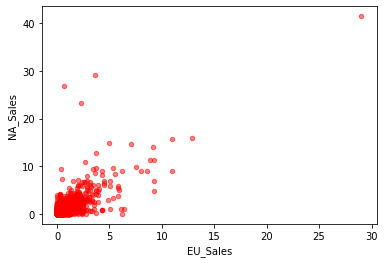

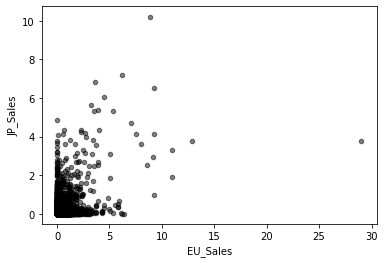

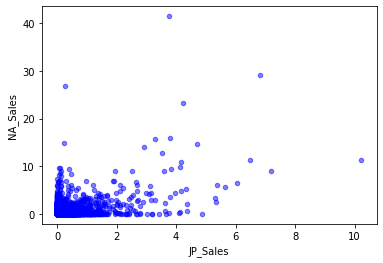

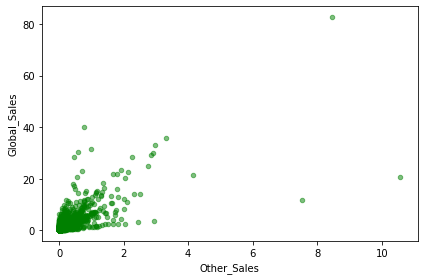

In [9]:
#Scatterplot to compare different sales performance within eachother.
#EU Sales vs NA Sales
dataframe.plot(kind='scatter', x='EU_Sales', y='NA_Sales', alpha=0.5, color='red')
plt.xlabel = ('EU_Sales')
plt.ylabel = ('NA_Sales')

#EU Sales vs JP Sales
dataframe.plot(kind='scatter', x='EU_Sales', y='JP_Sales', alpha=0.5, color='black')
plt.xlabel = ('EU_Sales')
plt.ylabel = ('JP_Sales')

#JP Sales vs NA Sales
dataframe.plot(kind='scatter', x='JP_Sales', y='NA_Sales', alpha=0.5, color='blue')
plt.xlabel = ('JP_Sales')
plt.ylabel = ('NA_Sales')

#Other Sales vs Global Sales
dataframe.plot(kind='scatter', x='Other_Sales', y='Global_Sales', alpha=0.5, color='green')
plt.xlabel = ('Other_Sales')
plt.ylabel = ('Global_Sales')
plt.tight_layout()

<p> Observation: <br>
    <p> NA vs EU <br>
        <p>NA Sales have excelled resulting in farthest between 20-30 and 10-20 for NA and 5-15 for EU, This might probably be because of high population, diversity or other factors in NA that might have made the sales shoot higher rather than EU.
            <br>
            <p> JP vs EU <br>
                <p>Most of the plots lie between 4-8 for JP. The amount of plots however is higher when compared to EU whereas EU has plots more towards higher numbers between 5-15 but JP has more number of sales, this might be due to specific conditions that JP sales have excelled in and not others.
<br>
<p> NA vs JP <br>
<p> JP has more sales towards 2-6. Even though NA has more sales when compared to EU, it might be possible that in certain cases JP does well, might be possible that Game content is more towards attracting JP audiences.
<br>
    <p> Global vs Others<br>
        <p> Global includes all cases including Others's as well, we plot this to identify any variances in the data. There are very less sales in 4-10 and 40-60, this means that there exist certain rare cases where sales have not met expectations in both Global and Others.

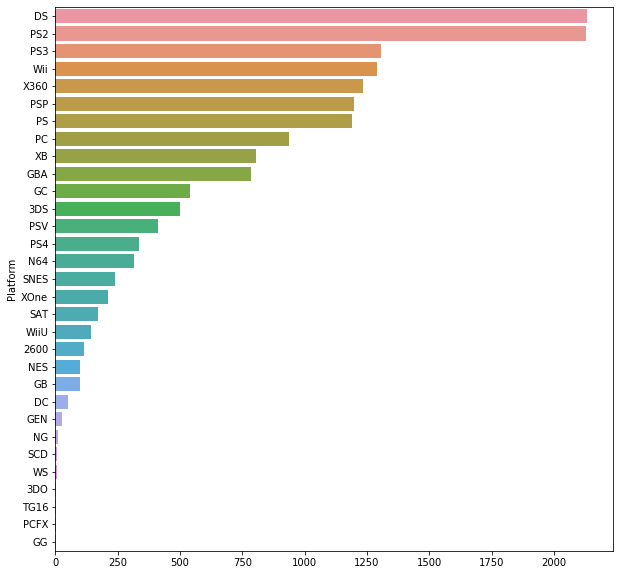

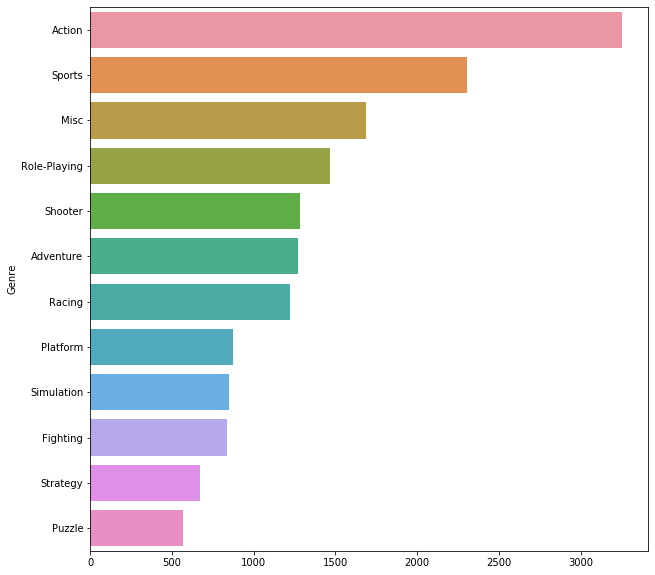

In [10]:
#To know which platform produces more amount of games
platgen = pd.crosstab(dataframe.Platform,dataframe.Genre)
total = platgen.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(y = total.index, x = total.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "Games"
plt.show()

#To know which publisher produces more games
platgen = pd.crosstab(dataframe.Genre,dataframe.Publisher)
total = platgen.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(y = total.index, x = total.values, orient='h')
plt.ylabel = "Publisher"
plt.xlabel = "Games"
plt.show()


In [11]:
#To know which year produces more games
count = dataframe.groupby('Year', axis=0).count().reset_index()[['Year','Name']].sort_values(by = "Name", ascending=True)
layout = go.Layout(
    
   
    xaxis=dict(
        title='Number of Games'
    ),
    height=1000, width=1000
)

trace = go.Bar(
            x=count.Name,
            y=count.Year,
            orientation = 'h'
        )


fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Observation <br>
<p> From graph 1 we find that DS and PS2 have acheived the maximum number of game releases and GG and PCFX is the least. It is also observed that DS and PS2 marked the era where games started to impact people since both were released in the same year whereas GG and PCFX are consoles that were first introduced.
    <br> <p>
        From graph 2 we find that Action is the genre that has most games released, followed by Sports. This does not mean that audience are interested in such Genres just because there are more games in that domain. <br> <p>
            From graph 3 we find that more number of games were released between 2005 - 2010 and that was also the period when DS and PS2 were released which we analysed from graph 1. About 1431 games in the year 2009 and 1428 in the year 2008 were released

In [12]:
#Preprocess the dataframe for year 1980
dataframe1980 = dataframe[dataframe.Year == 1980].iloc[:10,:]
pie_chart = dataframe1980.Global_Sales
labels_field = dataframe1980.Name
publisher_field = dataframe1980.Publisher

fig = {
    "data": [
        {
            "values": pie_chart,
            "labels": labels_field,
            "domain":{"x": [0,.5]},
            "name": "Sale Rate",
            "hoverinfo": "label+percent+name",
            "hole": .3,
            "type":"pie"
        },],
    "layout": {
        "title":"Top 10 Market Leaders In 1980",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": True,
              "text": "Games",
                "x": 0.20,
                "y": 1
    },]}

}
py.offline.iplot(fig)

#Preprocess the dataframe for year 2000
dataframe2000 = dataframe[dataframe.Year == 2000].iloc[:10,:]
pie_chart = dataframe2000.Global_Sales
name_field = dataframe2000.Name
#publisher_field = dataframe2000.Publisher

fig = {
    "data": [
        {
            "values": pie_chart,
            "labels": name_field,
            "domain":{"x": [0,.5]},
            "name": "Sale Rate",
            "hoverinfo": "label+percent+name",
            "hole": .3,
            "type":"pie"
        },],
    "layout": {
        "title":"Top 10 Market Leaders In 2000",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": True,
              "text": "Games",
                "x": 0.20,
                "y": 1
    },]}

}
py.offline.iplot(fig)

#Preprocess the dataframe for year 2016
dataframe2016 = dataframe[dataframe.Year == 2016].iloc[:10,:]
pie_chart = dataframe2016.Global_Sales
name_field = dataframe2016.Name
#Publisher_field = dataframe2016.Publisher

fig = {
    "data": [
        {
            "values": pie_chart,
            "labels": name_field,
            "domain":{"x": [0,.5]},
            "name": "Sale Rate",
            "hoverinfo": "label+percent+name",
            "hole": .3,
            "type":"pie"
        },],
    "layout": {
        "title":"Top 10 Market Leaders In 2016",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": True,
              "text": "Games",
                "x": 0.20,
                "y": 1
    },]}

}
py.offline.iplot(fig)


Observation: <br>
<p> From the pie charts above we observe that Sports have grown out to be one of the dominant over the years along with Action and Fiction. In the year 2000, There are different genre's where as down nearing 2016's each and every genre are more centralised.

In [13]:
#Preprocess the dataframe for analysis
dataframe_i = dataframe.iloc[:100,:]

#create the traces
trace_1 = go.Scatter(
                    x = dataframe_i.Rank,
                    y = dataframe_i.NA_Sales,
                    mode = "lines",
                    name = "NA Sales",
                    marker = dict(color="rgba(166,11,2,0.8)"),
                    text = dataframe_i.Name)

trace_2 = go.Scatter(
                    x = dataframe_i.Rank,
                    y = dataframe_i.EU_Sales,
                    mode = "lines+markers",
                    name = "EU Sales",
                    marker = dict(color = "rgba(80,12,160,0.5)"),
                    text = dataframe_i.Name)

trace_3 = go.Scatter(
                    x = dataframe_i.Rank,
                    y = dataframe_i.JP_Sales,
                    mode = "lines+markers",
                    name = "JP Sales",
                    marker = dict(color = "rgba(23,123,2,0.5)"),
                    text = dataframe_i.Name)

data = [trace_1,trace_2,trace_3]
layout = dict(title = "Global Sales of Top 100 Games",
                xaxis = dict(title="Rank",ticklen= 5, zeroline=False)
             )
fig = dict(data = data, layout = layout)
py.offline.iplot(fig)

Observation: <br>
<p> Top 100 games have been observed to be in Sports category followed by Fiction/RPG and finally Action, this however contradicts the initial observations. FPS in Action to be specific is least interested by audience where as FPS RPG games are more towards the top 100's.

[Text(0, 0.5, 'Genre'),
 Text(0.5, 0, 'Sales'),
 Text(0.5, 1.0, 'Genre vs Sales')]

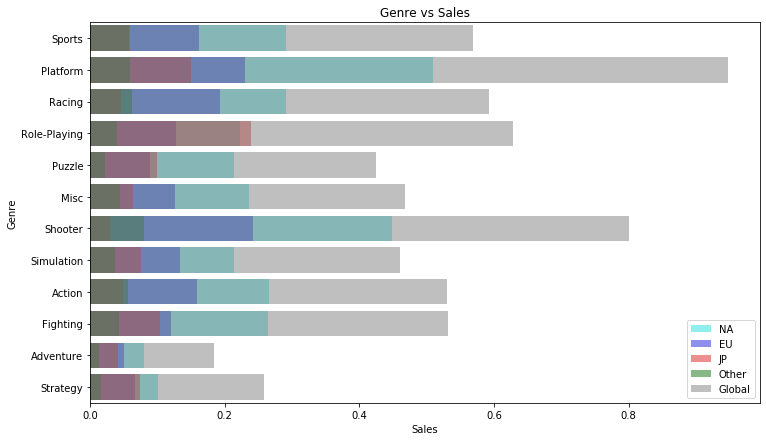

In [14]:
#To know sales according to genre at different regions
gen_li=list(dataframe.Genre.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in gen_li:
    val=dataframe[dataframe.Genre==i]
    na_sales.append(val.NA_Sales.mean())
    eu_sales.append(val.EU_Sales.mean())
    jp_sales.append(val.JP_Sales.mean())
    other_sales.append(val.Other_Sales.mean())
    global_sales.append(val.Global_Sales.mean())
    
fig,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=na_sales,y=gen_li,color='cyan',alpha = 0.5,label='NA' )
sns.barplot(x=eu_sales,y=gen_li,color='blue',alpha = 0.5,label='EU')
sns.barplot(x=jp_sales,y=gen_li,color='red',alpha = 0.5,label='JP')
sns.barplot(x=other_sales,y=gen_li,color='green',alpha = 0.5,label='Other')
sns.barplot(x=global_sales,y=gen_li,color='grey',alpha = 0.5,label='Global')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Sales', ylabel='Genre',title = "Genre vs Sales")

Observation:<br>
<p>
    NA shows highest sales in Platform and Shooter genre, where as JP is more focused towards RPG, Strategy and Puzzle. EU is focused towards Racing, Shooter and Sports. The Global Sales have shown increased sales in Platform and Shooter Genre.

In [15]:
#correlation matrix
dataframe.corr()

Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000

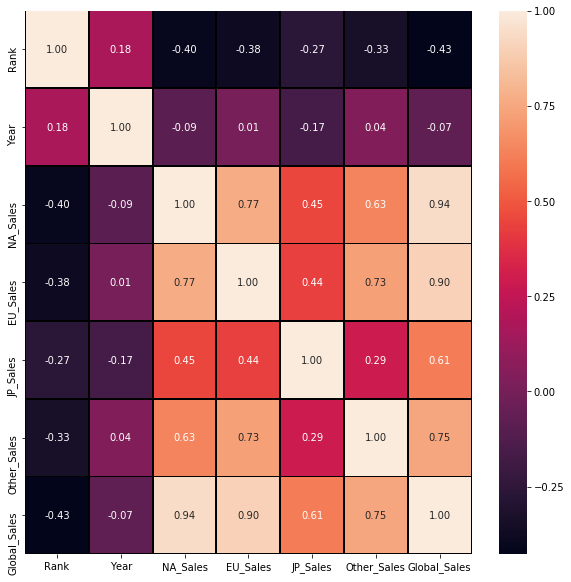

In [16]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataframe.corr(), annot=True, linewidths=.9, linecolor='black', fmt= '.2f',ax=ax)
plt.show()

## Preliminary Observation

<br>
It is observed that during 2005 - 2010 game sales have raised significantly. It was also during the period the audiences were exposed to larger number of games ranging from different genres. Since the consoles at that time were DS and PS4, The sales of those shooted up significantly. After the years of 2010, it is observed that the audiences are more focused towards finding their specific genre but its also known that Sports genre's are the leading common. <br> In Japan, the sales have significantly observed for RPG, Puzzle and Strategy type games as opposed to Sports and Action which have much lower sales in that region.<br> Global Sales is influenced by such factors and thereby is used as a reference to determine the ranking of the games.

# Method (Review)

<b>Linear Regression </b> is the process of predicting an outcome T with respect to X where T is dependant variable and X is independant variable by identifying the relationship between them. If X has multiple indpendant variables, then the process is termed as <b>Multiple Linear Regression </b>
<br>
<br>
The main objective of Linear Regression is to build a linear model inorder to predict the unknown variables with the help of known variables. <br>
<br>
It is mathematically represented by the formula : <br>
$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

and $w$ is the weight, which is defined as strength of connection between input variable $x$ and output variable $t$ i.e. how much change to $x$ affects $t$ is given by $w$

In [17]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

<b> Least Squares</b> is one of many methods in Linear Regression that determines the best fit line for the dataset by minimising the sum of squares between observed values minus predicted values (residuals). The residuals are treated as continous differentiable entities.<br>
<br>
Objective : <br>
$$ y = mx+c $$

1. Calculate mean of $x$ and $y$ from $f(x,y)$ as $X$ and $Y$ <br>
2. Calculate the slope $m = \frac{(x_i - X)(y_i - Y)}{(x_i - X)^2}$
3. Calculate mean and $C$ by $C = Y-mX$ and plot the line. <br>

# Code Explanation

<b> The train() method calculates the weight given by the formula: <br></b>

$$
w^* = \arg\min_w \sum_{i=1}^{N} \Big( f(x_i; w) - t_i \Big)^2
$$
<b>Further reduced as: <br></b>

$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$

<b> in use() we use this weight to predict the values<b>

In [18]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = super().add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T 
        return self.w
        ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y= X @ self.w
        return Y
    ## TODO: replace this with your codes

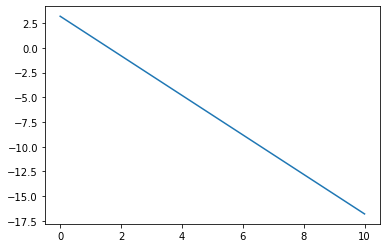

In [19]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

### Least Mean Squares

Least Mean Squares uses gradient algorithm where output is linear function of inputs. Since LMS is iterative, the weights gets corrected towards negative gradient equals minimum mean square error. It uses either batch learning or online learning where weights gets updated in every iteration along with its error. <br>
It is mathematically given as: <br>

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

reduced as : <br>

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

# Code Explanation

<b> The train() function is used to train batch wise wherein each result gives corrected weight with error, therefore next batch gets trained with corrected weight and error. This is acheived using for loop. <br>
    The train_step() function is used to calculate the weight for each iteration / step. <br>
    alpha is the learning rate <br>
    The use() method is called to determine the predicted values

In [20]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Least Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        N= X.shape[0]
        for i in range(N):
            self.train_step(X[i],T[i])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack([1,x]) 
        x = x.reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        self.w -=  self.alpha * (self.w.T @ x - t) * x
          ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y = X @ self.w
        return Y  ## TODO: replace this with your codes

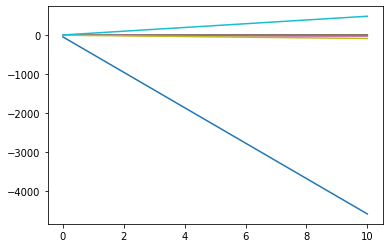

In [21]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

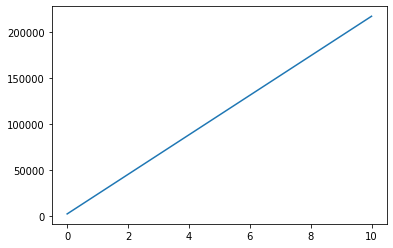

In [22]:
lms.train(X, T)
plt.plot(lms.use(X))

### Root Mean Square Error

We define root mean square as the square root of sum between predicted value and observed value

In [23]:
#Define Root Mean Square Error for correction
def root_mean_square_error(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

# Experiments

The data taken for the study is Video Game Sales. We are going to predict the Global Sales with the help of NA Sales, EU Sales, JP Sales and Other Sales. Since, Global Sales is the actual summation of NA, EU, JP and Other Sales, there is a linear relationship between them.

Two methods of prediction using linear regression will be tested namely LS - Least Squares and LMS - Least Mean Squares. The models and functions are defined above in the Method Section, We are going to prepare the data, run the models and analyse our predictions based on its accuracy. <br><br>

##### Data Preparation
<br>
<b> We read the entire dataset into a temporary dataframe as "tf", then extract the required data's for training and prediction and store it in the actual dataframe as "df" that we will be processing throughout.


In [4]:
df = pd.read_csv("vgsales.csv")
df.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [24]:
#Read the csv and gather the required data for analysis
tf = pd.read_csv("vgsales.csv", index_col=False)
df= tf[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
df

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0         41.49     29.02      3.77         8.46         82.74
1         29.08      3.58      6.81         0.77         40.24
2         15.85     12.88      3.79         3.31         35.82
3         15.75     11.01      3.28         2.96         33.00
4         11.27      8.89     10.22         1.00         31.37
...         ...       ...       ...          ...           ...
16593      0.01      0.00      0.00         0.00          0.01
16594      0.01      0.00      0.00         0.00          0.01
16595      0.00      0.00      0.00         0.00          0.01
16596      0.00      0.01      0.00         0.00          0.01
16597      0.01      0.00      0.00         0.00          0.01

[16598 rows x 5 columns]


#### Defining Input and Target
<br>
<b>Here we extract the dataset column wise and store it in X and T where X is the input values that will be used for training namely NA_Sales, EU_Sales, JP_Sales and Other Sales. T being the target value that needs to be predicted and in this case its Global_Sales

In [25]:
#Gather the values in the required column for input and target.
X = df.iloc[:,0:3].values
T = df.iloc[:,[4]].values
print("Shape of Input X\n",X.shape,"\n")
print("Shape of Target T\n",T.shape,"\n")
print("X as an array\n\n", X,"\n")
print("T as an array\n\n", T, "\n")

Shape of Input X
 (16598, 3) 

Shape of Target T
 (16598, 1) 

X as an array

 [[4.149e+01 2.902e+01 3.770e+00]
 [2.908e+01 3.580e+00 6.810e+00]
 [1.585e+01 1.288e+01 3.790e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.000e-02 0.000e+00]
 [1.000e-02 0.000e+00 0.000e+00]] 

T as an array

 [[8.274e+01]
 [4.024e+01]
 [3.582e+01]
 ...
 [1.000e-02]
 [1.000e-02]
 [1.000e-02]] 



#### Splicing of Dataset 80:20
<br>
<b> It is necessary to split the dataset accodingly for training and testing. 80% of the data's are used for training wherein its further split into X_train and X_test. 20% of the data's are used for testing wherein its further split into T_train and T_test. <br>

<br>

#### Why?
<br>
We do this in order to minimise overfitting of the data. The model must be able to predict correctly on unseen data which is the later 20% whereas 80% of the data is used for training and tweaking the model so that it is able to predict accurately with known data.

In [26]:
#Splice the data accordingly
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size = 0.20)
print("Test Data \n\n",T_test,"\n")
print("Test Data Shape\n\n",T_test.shape,"\n")
print("Train Data \n\n",X_train,"\n")
print("Train Data Shape \n\n",X_train.shape,"\n")

Test Data 

 [[5.000e-02]
 [1.490e+00]
 [1.000e-02]
 ...
 [3.000e-02]
 [2.900e-01]
 [1.069e+01]] 

Test Data Shape

 (3320, 1) 

Train Data 

 [[0.1  0.03 0.  ]
 [0.   0.   0.01]
 [0.08 0.02 0.  ]
 ...
 [0.9  0.45 0.63]
 [0.04 0.03 0.01]
 [0.13 0.1  0.  ]] 

Train Data Shape 

 (13278, 3) 



#### Perform Linear Regression using Least Squares
<br>
<b>We call in the method LinearRegress() where the functions of Least Squares are defined and storing it in ls object. We train the model using datasets of X_train and T_train, make a prediction on X_test and plot its variation on different values.

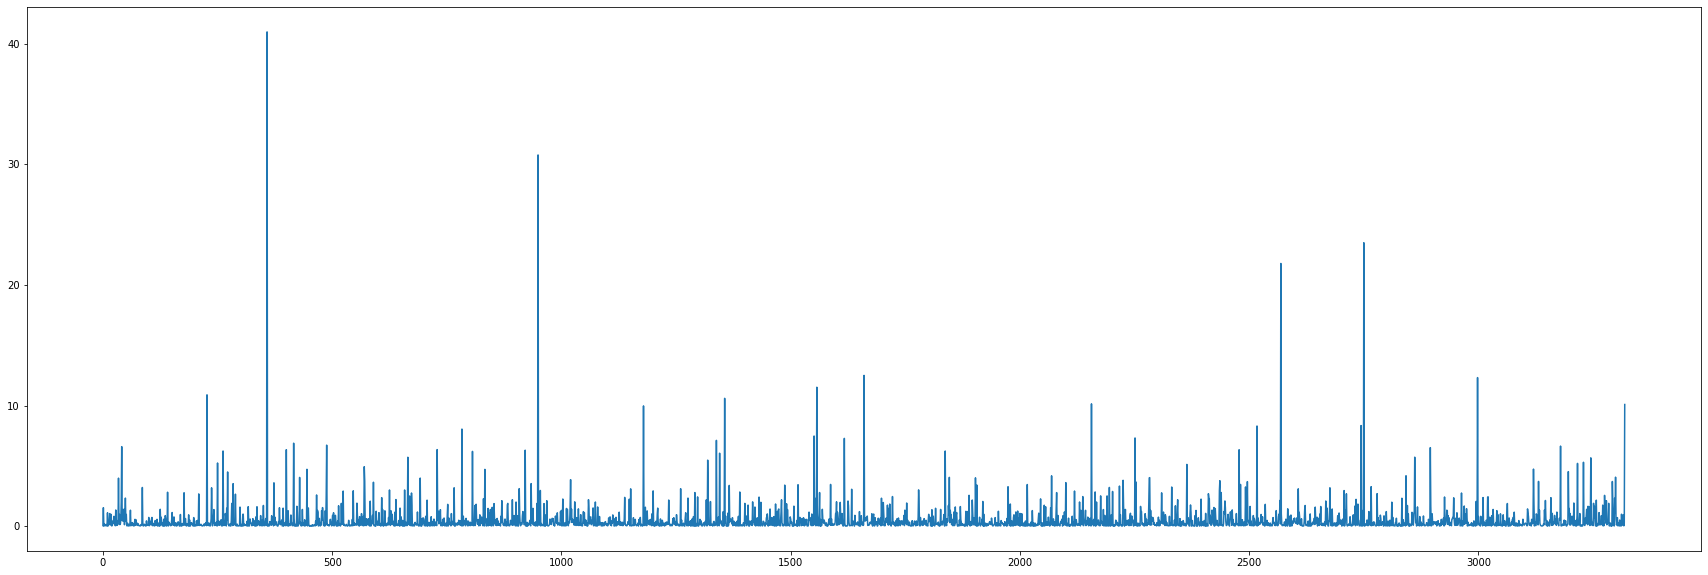

In [27]:
#perform regression analysis using LS
ls = LinearRegress()
ls.train(X_train, T_train)
fig = plt.figure()
fig.set_size_inches(30,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(ls.use(X_test))

<b> Store the predicted values in pdn_LS by including only values between 0 to 100 for comparison, analyse its structure, values and shape.

In [28]:
#perform the prediction
pdn_LS = ls.use(X_test)
print("Predicted data as Array \n\n",pdn_LS,"\n")
pdn_0 = pdn_LS[0::100]
print("Predicted data shape",pdn_LS.shape,"\n")

Predicted data as Array 

 [[ 0.05825271]
 [ 1.53910911]
 [ 0.0162045 ]
 ...
 [ 0.03554693]
 [ 0.30170843]
 [10.09030611]] 

Predicted data shape (3320, 1) 



<b> Store the test data in Test by including values from 0 to 100 for comparison, analyse its structure, amount of values and shape.

In [29]:
print("Test data for Comparison\n\n",T_test,"\n")
Test = T_test[0::100]
print("Test data shape\n\n",Test.shape,"\n")

Test data for Comparison

 [[5.000e-02]
 [1.490e+00]
 [1.000e-02]
 ...
 [3.000e-02]
 [2.900e-01]
 [1.069e+01]] 

Test data shape

 (34, 1) 



#### Comparison
<b> We plot the predicted and test data's inorder to visually compare the variation it has and how it affects the accuracy of the model later on. "Red" indicates predicted data and "Blue" indicates the spliced unknown test data (from the initial 20% split). 

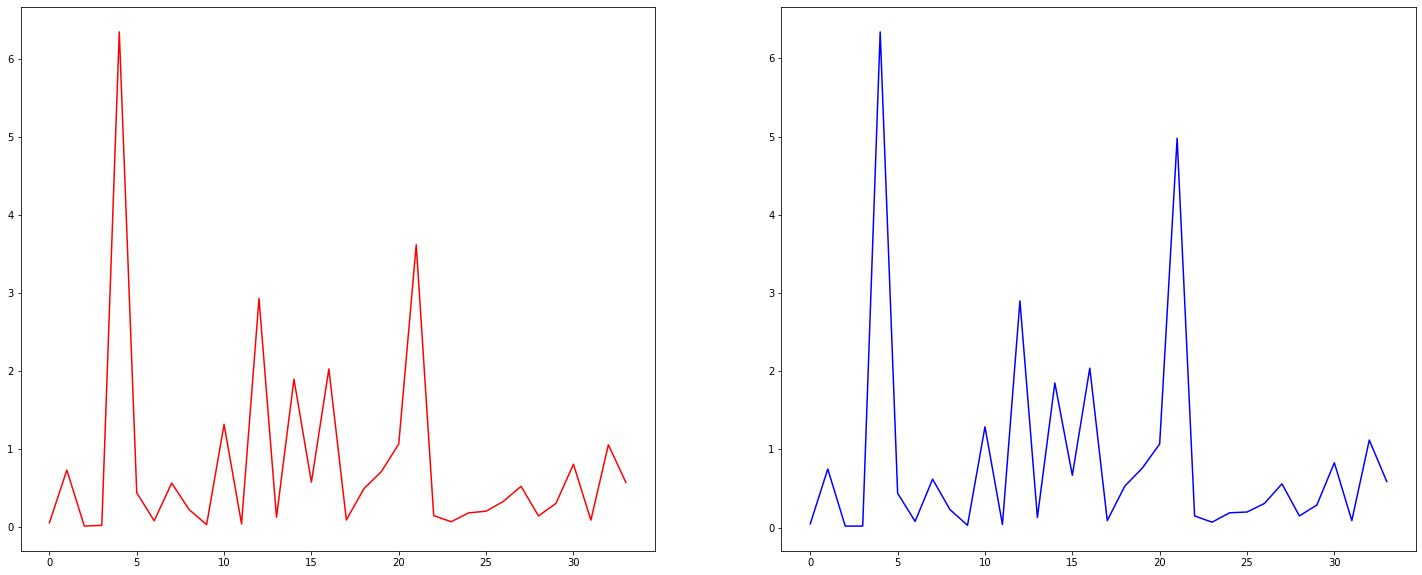

In [30]:
fig = plt.figure()
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,1)
plt.plot(pdn_0,color='red')
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,2)
plt.plot(Test,color='blue')

#### Calculate Root Mean Square Error

<b> We calculate the error by calling the function defined before as root_mean_square_error( parameter 1, parameter 2) between unknown Test data and predicted data using LS. <br></b>
<br>

#### Why?

<b> Our main objective of using this Machine Learning model is to reduce the error as much as possible to make sure that the prediction is close to 100%, by calculating Root Mean Square Error we get the amount of error that exists between the Test data and predicted data so that we can correct the model accodingly to minimise it as much as possible and improve its accuracy. Greater the Error value poor the prediction.

In [31]:
Er_LS = root_mean_square_error(T_test,pdn_LS)
print("Calculated Error\n\n",Er_LS)

Calculated Error

 13.36048306128362


#### Perform Linear Regression using Least Mean Squares
<b>We call in the method LMS(learning rate) where the functions of Least Mean Squares are defined and storing it in lms object. We train the model using datasets of X_train and T_train, make a prediction on X_test and plot its variation on different values.<br></b>
<br>

#### About Learning Rate as parameter for Least Mean Squares
<b>In our case we have passed learning rate to be 0.1, learning rate basically implies how much of a adjustment is made to the weight inorder to reduce the loss function as much as possible. In simpler terms, Greater the learning rate makes the model run faster but it costs accuracy similarly slower learning rate makes the model run slower but it gives even better accuracy. Therefore its important to find the optimal learning rate so that it performs well on the dataset and not overfit it.</b>


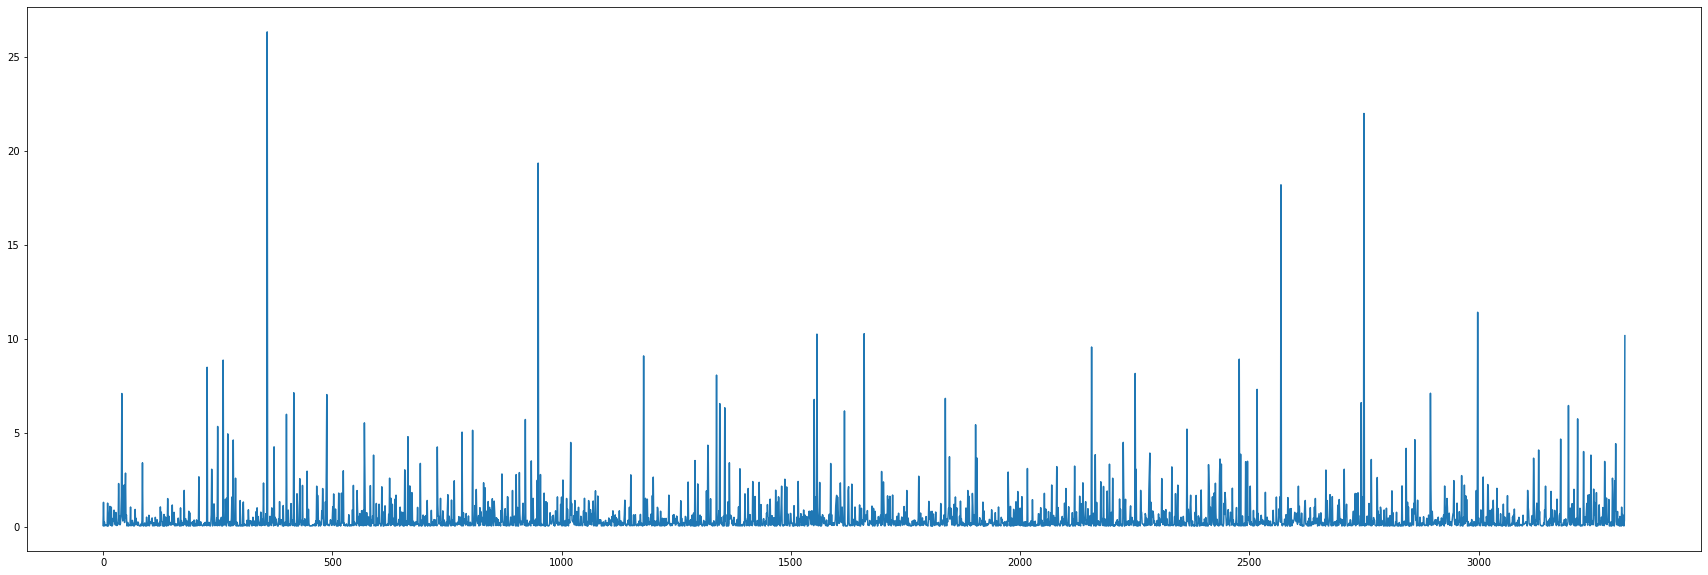

In [32]:
#perform regression analysis using LMS
lms = LMS(0.1)
lms.train(X_train, T_train)
fig = plt.figure()
fig.set_size_inches(30,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(lms.use(X_test))

<b> Store the predicted values in pdn_LMS by including only values between 0 to 200 for comparison, analyse its structure, values and shape.

In [33]:
#perform prediction using LMS
pdn_LMS = lms.use(X_test)
print("Predicted data as Array \n\n",pdn_LMS,"\n")
pdn_1 = pdn_LMS[0::200]
print("Predicted data shape",pdn_LMS.shape,"\n")

Predicted data as Array 

 [[ 0.10392161]
 [ 1.33147857]
 [ 0.07054662]
 ...
 [ 0.07893061]
 [ 0.39123751]
 [10.1839412 ]] 

Predicted data shape (3320, 1) 



<b> Store the test datas in Test1 by including only values between 0 to 200 for comparison, analyse its structure, values and shape.

In [34]:
print("Test data for Comparison\n\n",T_test,"\n")
Test1 = T_test[0::200]
print("Test data shape\n\n",Test.shape,"\n")

Test data for Comparison

 [[5.000e-02]
 [1.490e+00]
 [1.000e-02]
 ...
 [3.000e-02]
 [2.900e-01]
 [1.069e+01]] 

Test data shape

 (34, 1) 



#### Comparison
<b> We plot the predicted and test data's inorder to visually compare the variation it has and how it affects the accuracy of the model later on. "Red" indicates predicted data and "Blue" indicates the spliced unknown test data (from the initial 20% split).

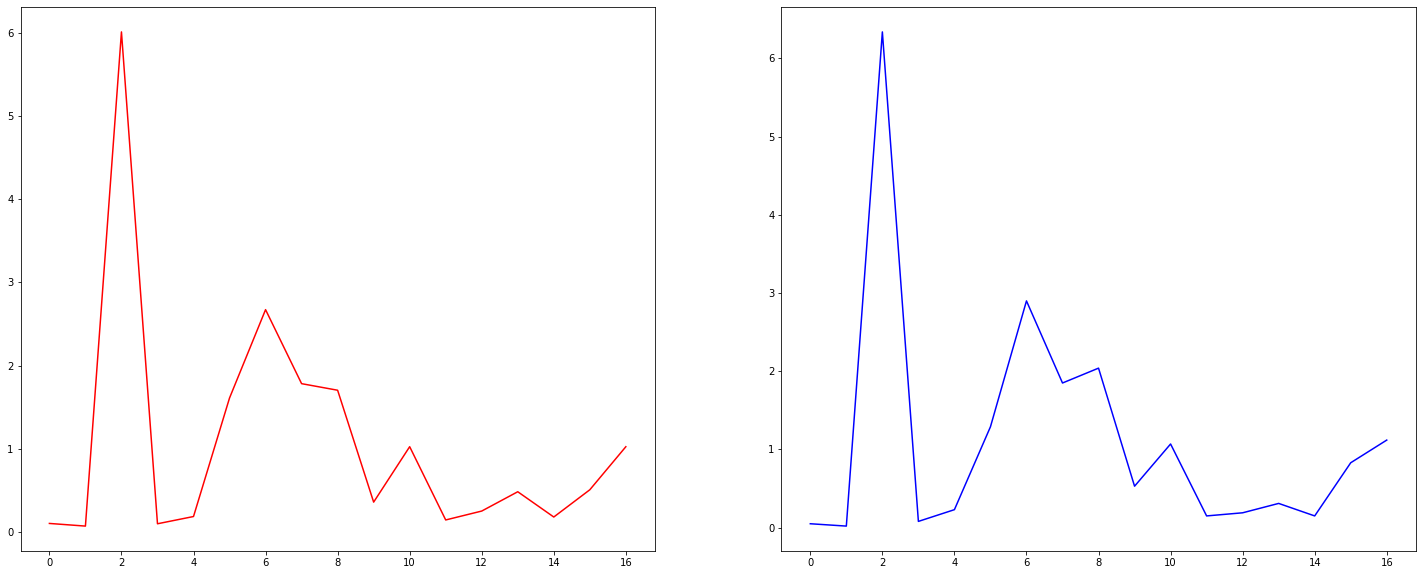

In [35]:
fig = plt.figure()
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,1)
plt.plot(pdn_1,color='red')
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,2)
plt.plot(Test1,color='blue')

#### Calculate Root Mean Square Error

<b> We calculate the error by calling the function defined before as root_mean_square_error( parameter 1, parameter 2) between unknown Test data and predicted data using LMS. <br></b>
<br>
#### Again Why?

<b> Our main objective of using this Machine Learning model is to reduce the error as much as possible to make sure that the prediction is close to 100%, by calculating Root Mean Square Error we get the amount of error that exists between the Test data and predicted data so that we can correct the model accodingly to minimise it as much as possible and improve its accuracy. Greater the Error value poor the prediction.

In [36]:
Er_LMS = root_mean_square_error(T_test,pdn_LMS)
Er_LMS

28.77669426019469

# Analysis / Comparisons of Algorithms

From the above results Least Squares performs well having reduced error rate when compared to Least Mean Squares however it is highly dependent on the data's in the dataset, if the data's have high linearity and greater correlation, LS performs well whereas if there are insufficient data's or if the data's are highly scattered LMS gives more accurate results. <br>
Performance wise Least Squares perform far better than Least Mean Squares since LMS updates weights and errors every iteration whereas LS calculates weights and error for the entire dataset. <br>



# Conclusions & References

Hence, we were able to perform Data Analysis and Visualisation on the dataset "Video Game Sales" and were able to uderstand the data. Then we were able to define the Linear Regression models for two different approaches (Least Squares and Least Mean Squares) and implement them on our dataset, obtain results and determine the error rate. We were finally able to visualise and also identify which method performs well in which case. <br>


Source of datasets: <br>

https://www.kaggle.com/gregorut/videogamesales <br>

<br>

Documentation and Resources : <br>

https://docs.python.org/3/ <br>
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb <br>
https://en.wikipedia.org/wiki/Linear_regression <br>
https://en.wikipedia.org/wiki/Least_mean_squares_filter <br>
https://en.wikipedia.org/wiki/Least_squares <br>
https://svivek.com/teaching/machine-learning/lectures/slides/linear-models/lms-regression.pdf <br>
https://seaborn.pydata.org <br>
https://www.kaggle.com <br>

# Extra Credits

<b>Q: What is the most and least significant features of your data? </b>
<br>
A: In order to understand, we plot correlation graph as given below:

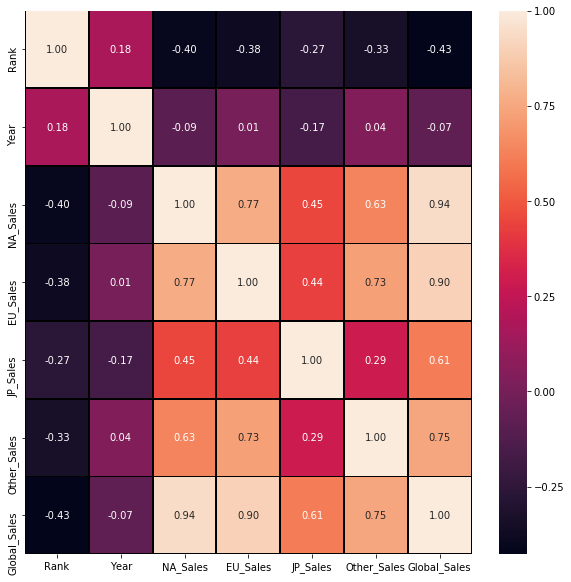

In [37]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataframe.corr(), annot=True, linewidths=.9, linecolor='black', fmt= '.2f',ax=ax)
plt.show()

From above values, we notice that the least significant values are Rank which always exists in negatives followed by Year, Therefore <b> The least significant data column is Rank </b> Similarly <b> the most significant data is NA_Sales</b> since it has the highest correlation upto 0.94.

<b> Q: what are the consequences if you remove those features from the model? (Show your work!)</b>
A: By removing Rank from the dataset, it doesn't affect the model as it was never used for predicting the values. However in case of most significant value it might differ, Using LS and LMS method for Linear Regression after removing the features we get the following</br>

In [38]:
df2 = pd.read_csv("vgsales.csv")
df3= df2[["EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
df3

EU_Sales  JP_Sales  Other_Sales  Global_Sales
0         29.02      3.77         8.46         82.74
1          3.58      6.81         0.77         40.24
2         12.88      3.79         3.31         35.82
3         11.01      3.28         2.96         33.00
4          8.89     10.22         1.00         31.37
...         ...       ...          ...           ...
16593      0.00      0.00         0.00          0.01
16594      0.00      0.00         0.00          0.01
16595      0.00      0.00         0.00          0.01
16596      0.01      0.00         0.00          0.01
16597      0.00      0.00         0.00          0.01

[16598 rows x 4 columns]

In [39]:
X = df.iloc[:,0:2].values
T = df.iloc[:,[3]].values
print("Shape of Input X\n",X.shape,"\n")
print("Shape of Target T\n",T.shape,"\n")
print("X as an array\n\n", X,"\n")
print("T as an array\n\n", T, "\n")

Shape of Input X
 (16598, 2) 

Shape of Target T
 (16598, 1) 

X as an array

 [[4.149e+01 2.902e+01]
 [2.908e+01 3.580e+00]
 [1.585e+01 1.288e+01]
 ...
 [0.000e+00 0.000e+00]
 [0.000e+00 1.000e-02]
 [1.000e-02 0.000e+00]] 

T as an array

 [[8.46]
 [0.77]
 [3.31]
 ...
 [0.  ]
 [0.  ]
 [0.  ]] 



In [40]:
#Splice the data accordingly
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size = 0.20)
print("Test Data \n\n",T_test,"\n")
print("Test Data Shape\n\n",T_test.shape,"\n")
print("Train Data \n\n",X_train,"\n")
print("Train Data Shape \n\n",X_train.shape,"\n")

Test Data 

 [[0.  ]
 [0.01]
 [0.  ]
 ...
 [0.01]
 [0.  ]
 [0.05]] 

Test Data Shape

 (3320, 1) 

Train Data 

 [[0.53 0.02]
 [0.13 0.  ]
 [0.1  0.  ]
 ...
 [0.21 0.06]
 [0.   0.  ]
 [0.11 0.09]] 

Train Data Shape 

 (13278, 2) 



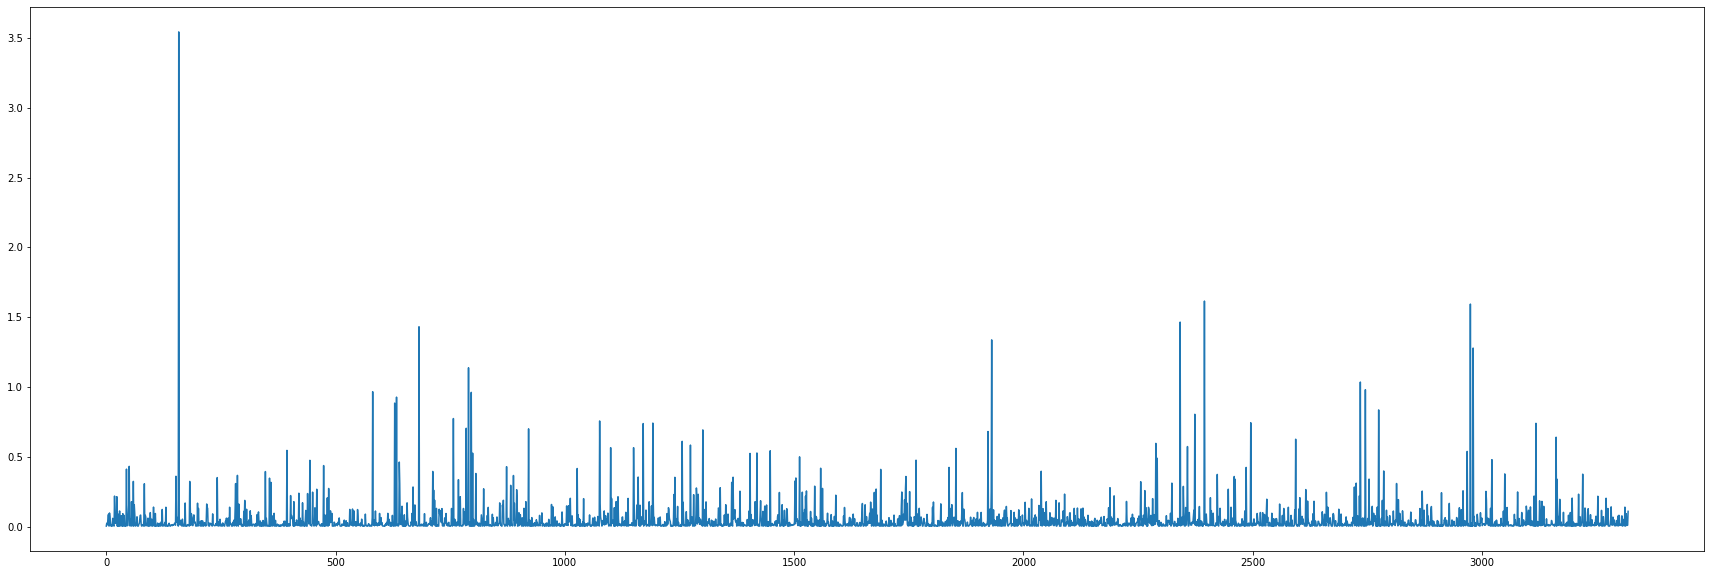

In [41]:
#perform regression analysis using LS
ls = LinearRegress()
ls.train(X_train, T_train)
fig = plt.figure()
fig.set_size_inches(30,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(ls.use(X_test))

In [42]:
#perform the prediction
pdn_LS = ls.use(X_test)
print("Predicted data as Array \n\n",pdn_LS,"\n")
pdn_0 = pdn_LS[0::100]
print("Predicted data shape",pdn_LS.shape,"\n")

Predicted data as Array 

 [[0.00402146]
 [0.02458641]
 [0.01274002]
 ...
 [0.01108989]
 [0.01044955]
 [0.10975241]] 

Predicted data shape (3320, 1) 



In [43]:
print("Test data for Comparison\n\n",T_test,"\n")
Test = T_test[0::100]
print("Test data shape\n\n",Test.shape,"\n")

Test data for Comparison

 [[0.  ]
 [0.01]
 [0.  ]
 ...
 [0.01]
 [0.  ]
 [0.05]] 

Test data shape

 (34, 1) 



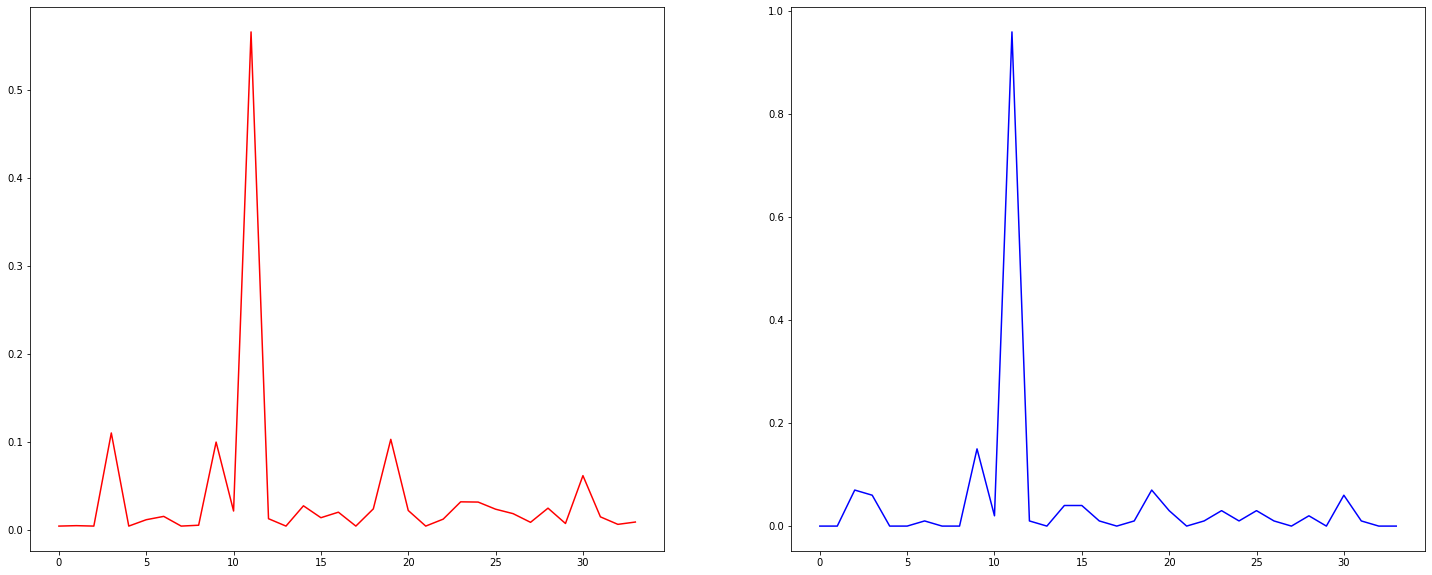

In [44]:
fig = plt.figure()
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,1)
plt.plot(pdn_0,color='red')
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,2)
plt.plot(Test,color='blue')

In [45]:
Er_LS = root_mean_square_error(T_test,pdn_LS)
print("Calculated Error\n\n",Er_LS)

Calculated Error

 5.197089155135197


Predicted data as Array 

 [[0.00600896]
 [0.02773689]
 [0.01551553]
 ...
 [0.01524691]
 [0.00926098]
 [0.13423724]] 

Predicted data shape (3320, 1) 



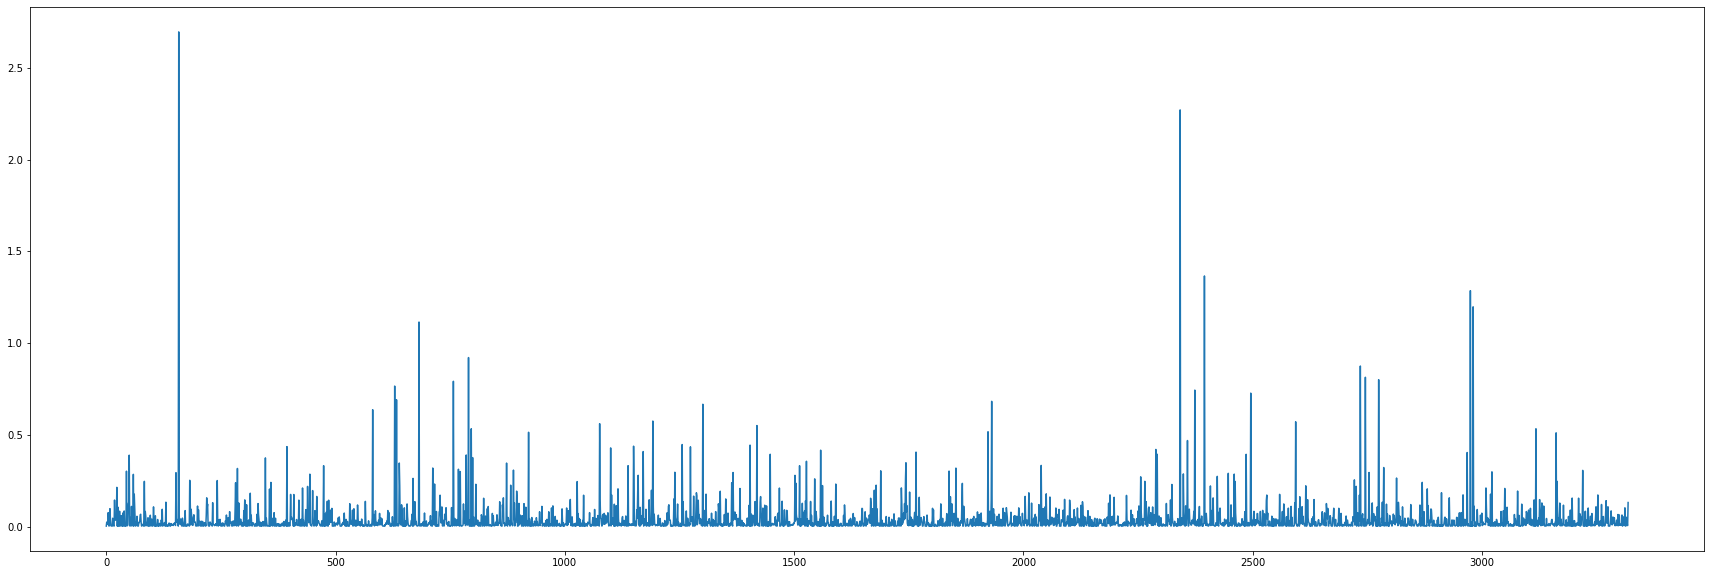

In [46]:
#perform regression analysis using LMS
lms = LMS(0.1)
lms.train(X_train, T_train)
fig = plt.figure()
fig.set_size_inches(30,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(lms.use(X_test))
#perform prediction using LMS
pdn_LMS = lms.use(X_test)
print("Predicted data as Array \n\n",pdn_LMS,"\n")
pdn_1 = pdn_LMS[0::200]
print("Predicted data shape",pdn_LMS.shape,"\n")

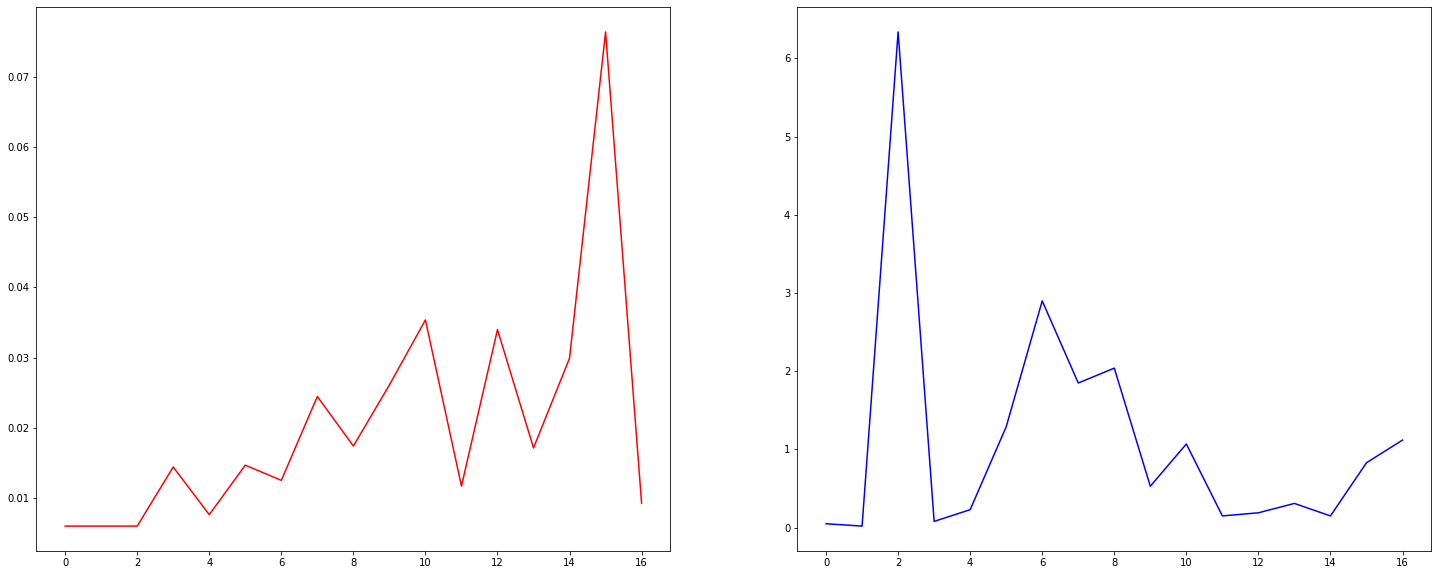

In [47]:
fig = plt.figure()
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,1)
plt.plot(pdn_1,color='red')
fig.set_size_inches(25,10)
ax1 = fig.add_subplot(1,2,2)
plt.plot(Test1,color='blue')

In [48]:
Er_LMS = root_mean_square_error(T_test,pdn_LMS)
Er_LMS

5.536060504091532

<b> From the above results we infer that, removing the most significant column reduces the accuracy and increases the RMSE leading to inaccurate predictions when compared to previous results with the significant column. However, the change is very minimal also suggesting that the remaining data is sufficient to make a decent prediction using LS.</b>

<b>Q: Produce residual plots and observe the patterns for the goodness of fit</b> <br>
A: The plot given as follows:

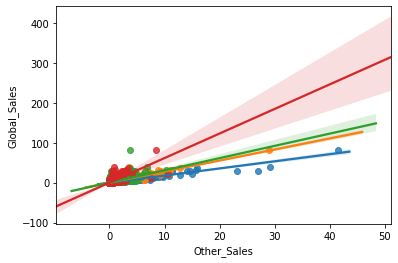

In [49]:
ax = sns.regplot(x="NA_Sales", y="Global_Sales", data=df)
ax = sns.regplot(x="EU_Sales", y="Global_Sales", data=df)
ax = sns.regplot(x="JP_Sales", y="Global_Sales", data=df)
ax = sns.regplot(x="Other_Sales", y="Global_Sales", data=df)

# Preliminary Test

In [50]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
